### Clear background

In [36]:
from PIL import Image
import os
import numpy as np
import cv2


#### Simple threshold binarization

In [42]:
# Create the output directory if it doesn't exist
output_folder = "_NoBackground"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get a list of all image files in the input directory
input_folder = "_Parced"
image_files = [f for f in os.listdir(input_folder) if os.path.isfile(os.path.join(input_folder, f))]

# Loop through each image file
for image_file in image_files:
    # Open the image
    img = Image.open(os.path.join(input_folder, image_file))

    # Convert the image to a NumPy array
    img_array = np.array(img)

    # Remove the background (replace white pixels with transparency)
    img_array[(img_array[:,:,0] > 200) & (img_array[:,:,1] > 200) & (img_array[:,:,2] > 200)] = [0, 0, 0, 0]

    # Convert the NumPy array back to an image
    img_no_background = Image.fromarray(img_array)

    # Save the image to the output directory
    img_no_background.save(os.path.join(output_folder, image_file))

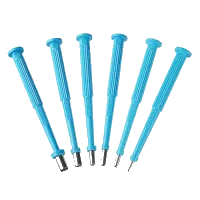

In [3]:
img_no_background

#### Gaussian Threeshold

In [38]:
def remove_background(image):
    tmp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    alpha = cv2.adaptiveThreshold(tmp,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,5,10)
    b, g, r = cv2.split(image)
    rgba = [b,g,r, alpha]
    image_transparent = cv2.merge(rgba,4)
    return image_transparent


In [39]:
# Loop through each image file
for image_file in image_files:
   
    img = cv2.imread(os.path.join(input_folder, image_file))   
    img_no_background = remove_background(img)
    img_no_background = cv2.imwrite(os.path.join(output_folder, image_file),img_no_background)


### Contour detection

In [40]:
# Loop through each image file
for image_file in image_files:
    # Open the image
    img = cv2.imread(os.path.join(input_folder, image_file))

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply a Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use adaptive thresholding to create a binary image
    # _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # _, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    thresh = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,10)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask for the object using the largest contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Remove the background using the mask
    img_no_background = cv2.bitwise_and(img, img, mask=mask)

    # Save the image to the output directory
    cv2.imwrite(os.path.join(output_folder, image_file), img_no_background)